In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import imageio
import glob

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d



In [3]:
df = pd.read_csv('data/fashion_data/styles.csv', error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [4]:
df.set_index('id', inplace=True)

In [5]:
# from os import listdir
# from os.path import isfile, join
# pic_files = [f for f in listdir('data/fashion-product-images-small/images') if isfile(join('data/fashion-product-images-small/images', f))]

In [6]:
# pic_files

In [7]:
path = r'/Users/Kelly/galvanize/week8/data/fashion_data/images'
files = glob.glob(path + "/*.jpg")
idx_series = pd.Series(files).str.replace('/Users/Kelly/galvanize/week8/data/fashion_data/images/', '').str.replace('.jpg', '')

In [8]:
pic_arr = np.array(files)

In [9]:
def get_pixels(files):
    r = np.zeros((len(files),14400))
    bad_list = []
    for i in range(len(files)):
        img = imageio.imread(files[i])
        flat = np.array(img).flatten()
        if len(flat) == 14400:   
            r[i,:] = flat  
#        else: 
#            bad_list.append(files[i])
    return r

In [10]:
images_arr = get_pixels(pic_arr)

In [11]:
pic_df0 = pd.DataFrame(images_arr, index=idx_series.astype(int), dtype='int')

In [12]:
pic_df = pic_df0[pic_df0.notnull]

In [96]:
pic_idx = set(pic_df.index)
df_idx = set(df.index)

In [97]:
df = df[df.index.isin(pic_idx)]
pic_df = pic_df[pic_df.index.isin(df_idx)]

In [41]:
xx = np.array(pic_df.iloc[0,:].astype(int))
tt = xx.reshape(80, 60, 3)
# tt.shape

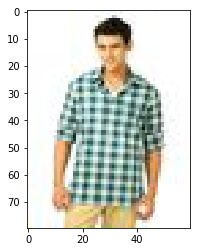

In [42]:
plt.imshow(tt)

In [78]:
df.columns

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [79]:
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
id,,,,,,,,,
15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [117]:
df['masterCategory'].value_counts()

Apparel           21392
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [103]:
df['gender'].value_counts()

Men       22142
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

In [116]:
df[df['masterCategory']=='Apparel'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Apparel Set,106,106,106,106,106,106,106,106
Bottomwear,2693,2693,2693,2687,2693,2693,2691,2693
Dress,478,478,478,478,478,478,478,478
Innerwear,1808,1808,1808,1808,1808,1808,1806,1808
Loungewear and Nightwear,470,470,470,470,470,470,464,470
Saree,427,427,427,427,427,427,427,427
Socks,12,12,12,12,12,12,12,12
Topwear,15398,15398,15398,15398,15397,15397,15384,15398


In [124]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Accessories,129,129,129,129,129,129,129,129
Bags,3055,3055,3055,3055,3055,3055,3055,3053
Belts,811,811,811,811,811,811,811,811
Cufflinks,108,108,108,108,108,108,108,108
Eyewear,1073,1073,1073,1073,1073,1073,1073,1073
Gloves,20,20,20,20,20,20,20,20
Headwear,293,293,293,293,293,293,293,293
Jewellery,1079,1079,1079,1079,1079,1079,1079,1079
Mufflers,38,38,38,38,38,38,38,38


In [136]:
df[df['masterCategory']=='Footwear'].groupby('subCategory').count()

,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,
Flip Flops,913,913,913,913,913,913,913,913
Sandal,963,963,963,963,963,963,961,963
Shoes,7343,7343,7343,7343,7323,7343,7343,7343


In [125]:
wearable_list = ['Apparel', 'Accessories', 'Footwear']

In [127]:
wearable_df = df[df['masterCategory'].isin(wearable_list)]

In [132]:
wear_idx = list(wearable_df.index)
wear_pics = pic_df[pic_df.index.isin(wear_idx)]

In [135]:
set(wear_pics.index) == set(wearable_df.index)

True

In [138]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clust = AgglomerativeClustering().fit(wear_pics)